In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [67]:
data = pd.read_csv("/content/sample_data/orange.csv.zip")
data.head(1)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0


In [68]:
print(data.shape)
data.isnull().sum()

(241, 11)


,0
Size (cm),0
Weight (g),0
Brix (Sweetness),0
pH (Acidity),0
Softness (1-5),0
HarvestTime (days),0
Ripeness (1-5),0
Color,0
Variety,0
Blemishes (Y/N),0


#1) Is there a correlation between the size (Size (cm)) and the weight (Weight (g)) of the fruit?

In [69]:
#1) Is there a correlation between the size (Size (cm)) and the weight (Weight (g)) of the fruit?

data1 = data[["Size (cm)","Weight (g)"]].corr()
data1

,Size (cm),Weight (g)
Size (cm),1.000000,0.305348
Weight (g),0.305348,1.000000


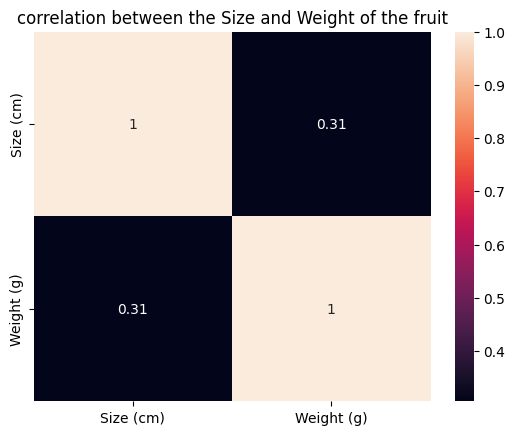

In [70]:
#correlation using heatmap
sn.heatmap(data1,annot = True)
plt.title("correlation between the Size and Weight of the fruit")
plt.show()

#2) How does the sweetness (Brix) of the fruit correlate with its acidity (pH)? Do sweeter fruits have lower acidity?

In [126]:
#2) How does the sweetness (Brix) of the fruit correlate with its acidity (pH)? Do sweeter fruits have lower acidity?

df = data.groupby("Brix (Sweetness)")["pH (Acidity)"].sum().reset_index()
df

,Brix (Sweetness),pH (Acidity)
0,5.5,4.40
1,6.0,8.40
2,6.1,3.30
3,6.2,2.80
4,6.3,6.90
...,...,...
77,15.6,3.40
78,15.7,3.00
79,15.8,3.60
80,15.9,4.37


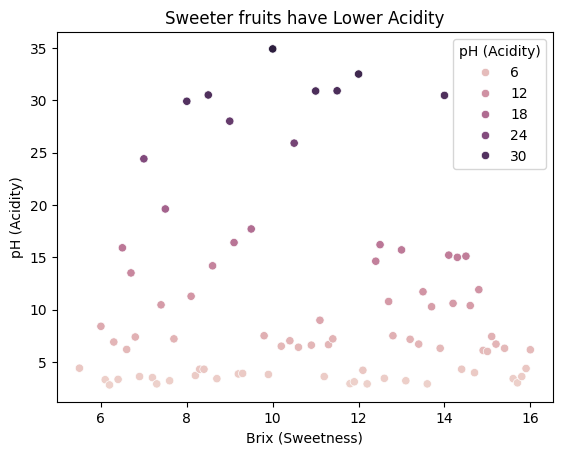

In [130]:
sn.scatterplot(data = df,x = "Brix (Sweetness)", y = "pH (Acidity)",hue = "pH (Acidity)")
plt.title("Sweeter fruits have Lower Acidity")
plt.show()

In [123]:
corr = data[["Brix (Sweetness)","pH (Acidity)"]].corr()
corr

,Brix (Sweetness),pH (Acidity)
Brix (Sweetness),1.00000,-0.30008
pH (Acidity),-0.30008,1.00000


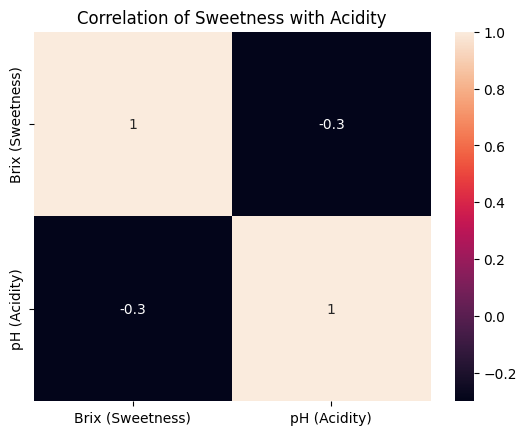

In [88]:
sn.heatmap(data = corr,annot = True)
plt.title("Correlation of Sweetness with Acidity")
plt.show()

#3) How does the softness (Softness (1-5)) of the fruit relate to its ripeness (Ripeness (1-5))?

In [90]:
#3) How does the softness (Softness (1-5)) of the fruit relate to its ripeness (Ripeness (1-5))?
corr = data[["Softness (1-5)","Ripeness (1-5)"]].corr()
corr

,Softness (1-5),Ripeness (1-5)
Softness (1-5),1.000000,-0.202404
Ripeness (1-5),-0.202404,1.000000


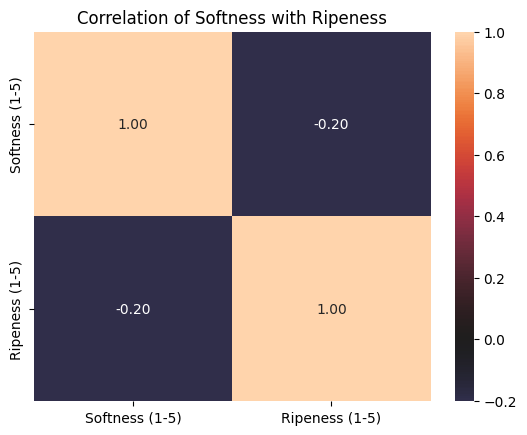

In [96]:
sn.heatmap(data = corr,annot = True, center=0, fmt='1.2f')
plt.title("Correlation of Softness with Ripeness")
plt.show()

#4) Do fruits with blemishes (Blemishes (Y/N)) tend to have lower ripeness or softness levels?

In [102]:
#4) Do fruits with blemishes (Blemishes (Y/N)) tend to have lower ripeness or softness levels?
#a)Blemishes (Y/N),Ripeness (1-5)

df = data.groupby("Blemishes (Y/N)")["Ripeness (1-5)"].sum().reset_index()
df

,Blemishes (Y/N),Ripeness (1-5)
0,N,582.0
1,N (Minor),4.0
2,N (Split Skin),2.0
3,Y (Bruise),3.5
4,Y (Bruising),30.0
5,Y (Minor Insect Damage),16.5
6,Y (Minor),47.0
7,Y (Mold Spot),31.5
8,Y (Scars),55.0
9,Y (Split Skin),25.0


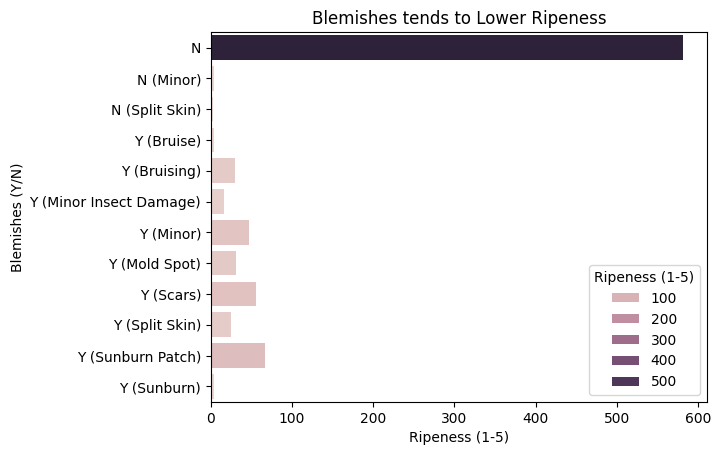

In [104]:
sn.barplot(data = df,y = "Blemishes (Y/N)",x = "Ripeness (1-5)",hue = "Ripeness (1-5)")
plt.title("Blemishes tends to Lower Ripeness")
plt.show()

In [105]:
#b)"Blemishes (Y/N)","Softness (1-5)"
df = data.groupby("Blemishes (Y/N)")["Softness (1-5)"].sum().reset_index()
df

,Blemishes (Y/N),Softness (1-5)
0,N,445.0
1,N (Minor),4.0
2,N (Split Skin),5.0
3,Y (Bruise),3.5
4,Y (Bruising),30.5
5,Y (Minor Insect Damage),17.5
6,Y (Minor),30.5
7,Y (Mold Spot),40.0
8,Y (Scars),57.5
9,Y (Split Skin),27.0


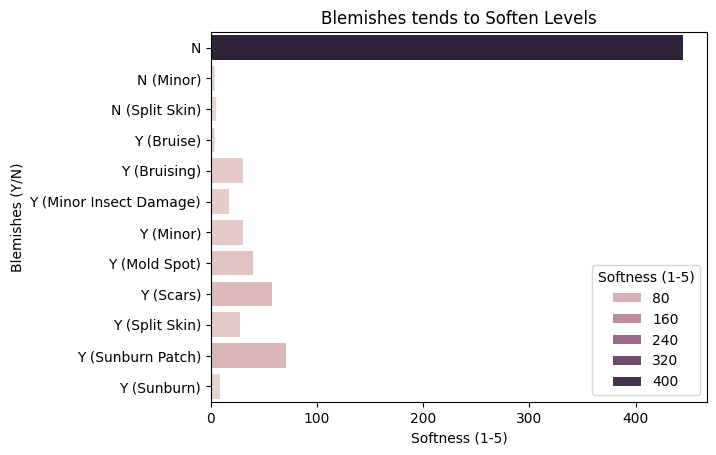

In [108]:
sn.barplot(data = df,x = "Softness (1-5)",y = "Blemishes (Y/N)",hue = "Softness (1-5)")
plt.title("Blemishes tends to Soften Levels")
plt.show()

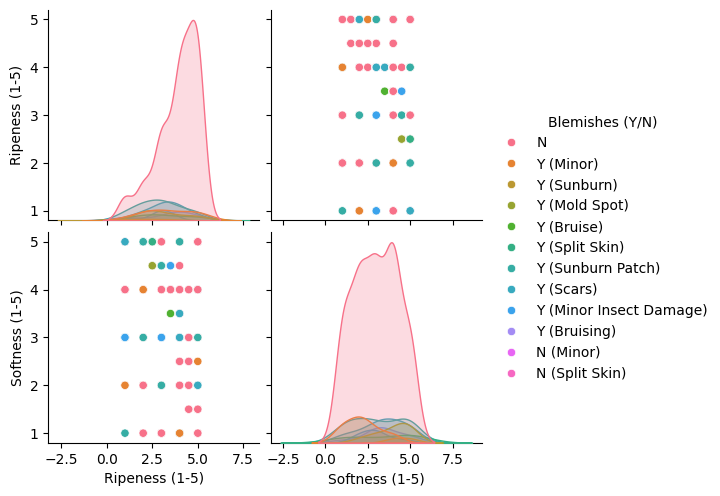

In [112]:
sn.pairplot(data[["Blemishes (Y/N)","Ripeness (1-5)","Softness (1-5)"]],hue = "Blemishes (Y/N)")
plt.show()

#5) How do different fruit varieties (Variety) differ in terms of size, weight, sweetness, acidity, and ripeness?

In [74]:
#5) How do different fruit varieties (Variety) differ in terms of size, weight, sweetness, acidity, and ripeness?
#a)"Variety","Size (cm)"
df1 = data.groupby("Variety")["Size (cm)"].sum().reset_index()
df2 = df1
df1

,Variety,Size (cm)
0,Ambiance,86.1
1,Blood Orange,19.0
2,California Valencia,55.2
3,Cara Cara,176.8
4,Clementine,106.1
5,Clementine (Seedless),26.0
6,Hamlin,40.8
7,Honey Tangerine,54.2
8,Jaffa,78.0
9,Midsweet (Hybrid),43.3


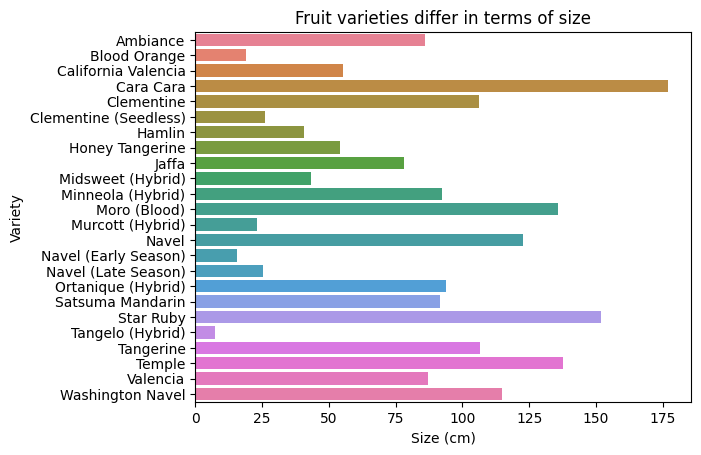

In [75]:
sn.barplot(data = df2,y = "Variety",x = "Size (cm)",hue = "Variety")
plt.title("Fruit varieties differ in terms of size")
plt.show()

In [76]:
#b)"Variety","Weight (g)"
df = data.groupby("Variety")["Weight (g)"].sum().reset_index()
df

,Variety,Weight (g)
0,Ambiance,2178
1,Blood Orange,550
2,California Valencia,1350
3,Cara Cara,4769
4,Clementine,3150
5,Clementine (Seedless),520
6,Hamlin,1035
7,Honey Tangerine,1299
8,Jaffa,2210
9,Midsweet (Hybrid),1135


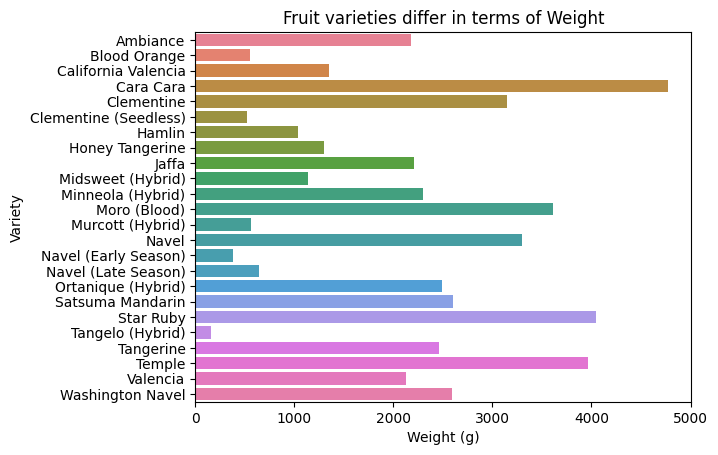

In [77]:
sn.barplot(data = df,x = "Weight (g)",y = "Variety",hue = "Variety")
plt.title("Fruit varieties differ in terms of Weight")
plt.show()

In [78]:
#c)"Variety","Brix (Sweetness)"
df = data.groupby("Variety")["Brix (Sweetness)"].sum().reset_index()
df

,Variety,Brix (Sweetness)
0,Ambiance,127.2
1,Blood Orange,15.5
2,California Valencia,72.5
3,Cara Cara,196.8
4,Clementine,159.2
5,Clementine (Seedless),54.5
6,Hamlin,54.5
7,Honey Tangerine,81.4
8,Jaffa,110.3
9,Midsweet (Hybrid),44.5


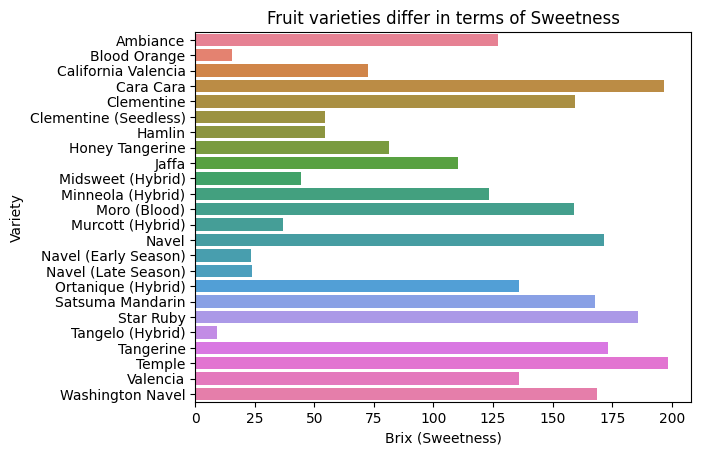

In [79]:
sn.barplot(data = df,x = "Brix (Sweetness)",y = "Variety",hue = "Variety")
plt.title("Fruit varieties differ in terms of Sweetness")
plt.show()

In [81]:
#d)"Variety","pH (Acidity)"
df = data.groupby("Variety")["pH (Acidity)"].sum().reset_index()
df

,Variety,pH (Acidity)
0,Ambiance,36.84
1,Blood Orange,7.90
2,California Valencia,23.20
3,Cara Cara,78.87
4,Clementine,48.01
5,Clementine (Seedless),11.70
6,Hamlin,16.50
7,Honey Tangerine,22.09
8,Jaffa,35.88
9,Midsweet (Hybrid),18.50


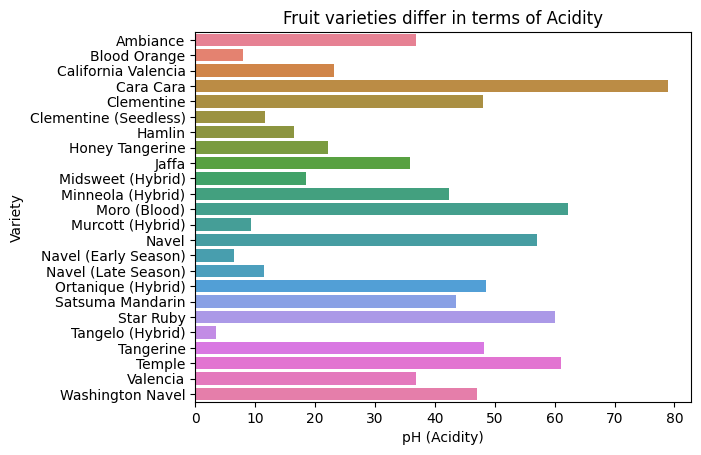

In [82]:
sn.barplot(data = df,x = "pH (Acidity)",y = "Variety",hue= "Variety")
plt.title("Fruit varieties differ in terms of Acidity")
plt.show()

In [83]:
#e)"Variety","Ripeness (1-5)"
df = data.groupby("Variety")["Ripeness (1-5)"].sum().reset_index()
df

,Variety,Ripeness (1-5)
0,Ambiance,36.5
1,Blood Orange,6.5
2,California Valencia,29.5
3,Cara Cara,70.5
4,Clementine,54.0
5,Clementine (Seedless),19.5
6,Hamlin,21.5
7,Honey Tangerine,31.0
8,Jaffa,45.0
9,Midsweet (Hybrid),18.0


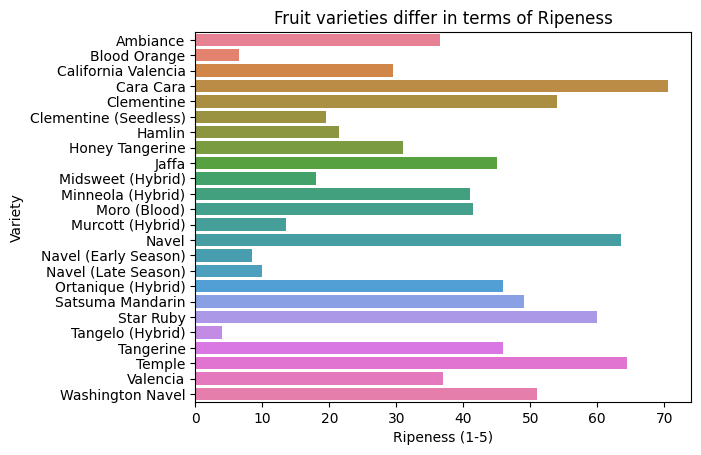

In [84]:
sn.barplot(data = df,x = "Ripeness (1-5)",y = "Variety",hue = "Variety")
plt.title("Fruit varieties differ in terms of Ripeness")
plt.show()

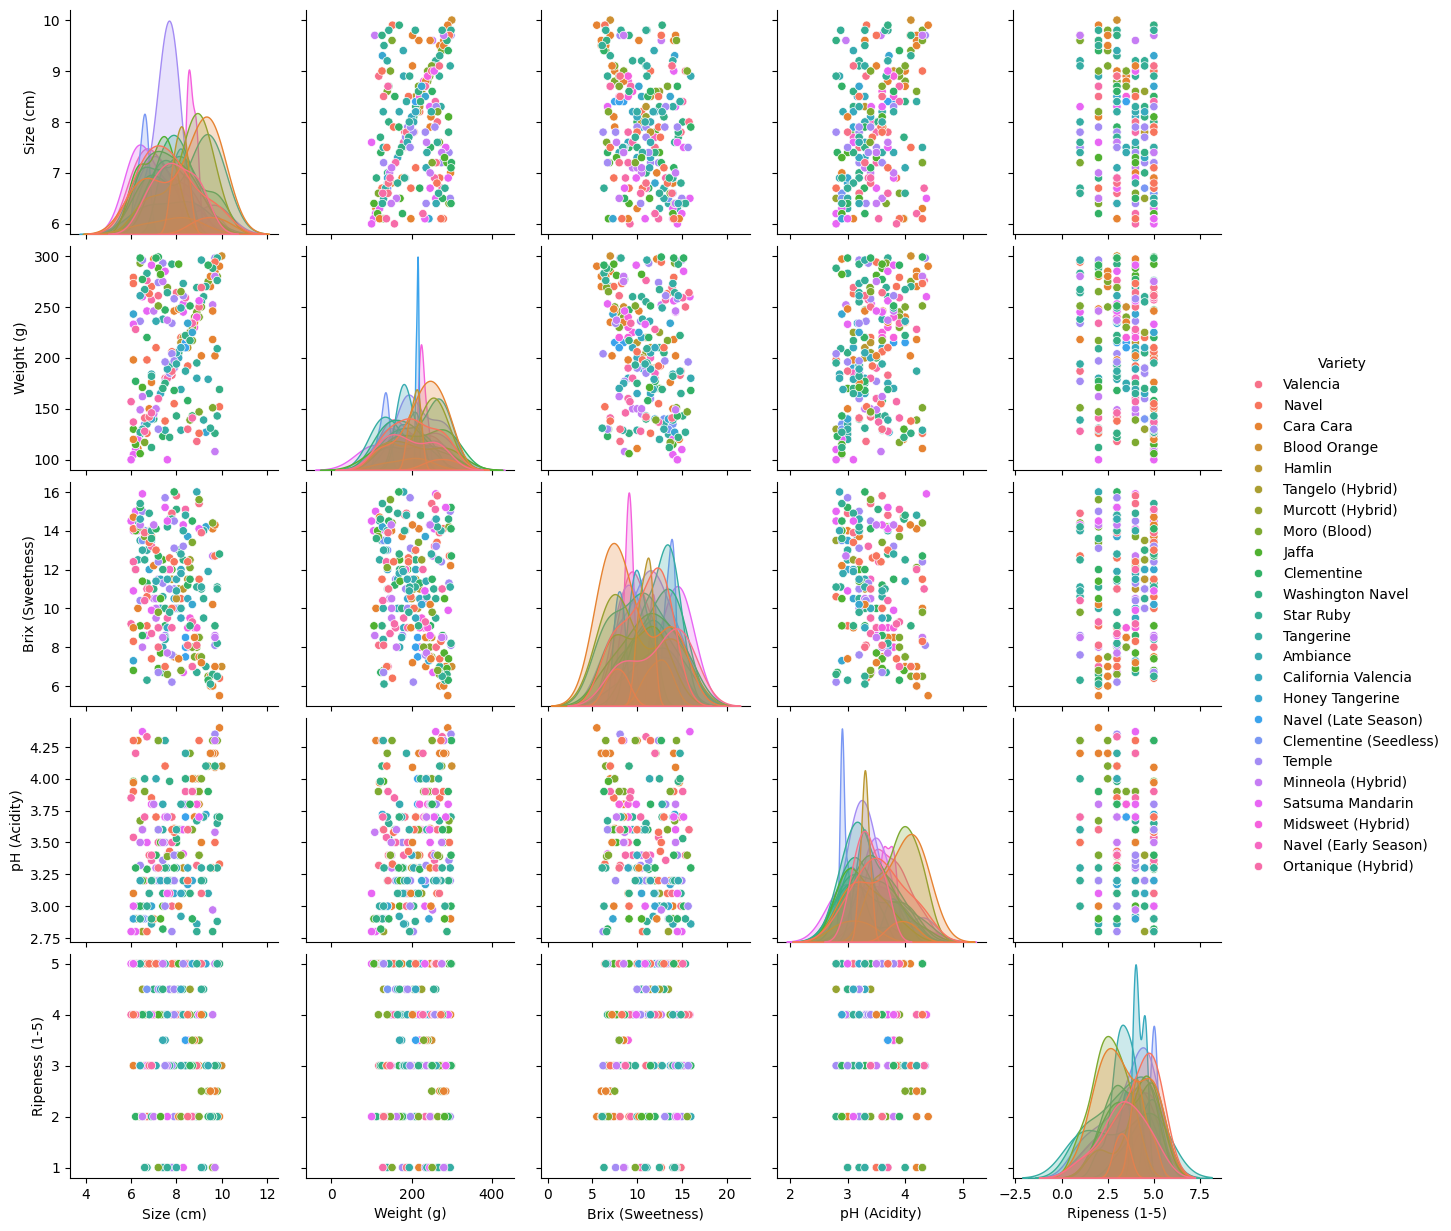

In [86]:
sn.pairplot(data[["Variety","Size (cm)","Weight (g)","Brix (Sweetness)","pH (Acidity)","Ripeness (1-5)"]],hue = "Variety")
plt.show()